In [7]:
## Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [9]:
## Read data from folders
df = pd.read_csv("cleaned_covid_data.csv")

In [10]:
## View a sample of the data
df.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,12/31/2019,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,1/1/2020,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,1/2/2020,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,1/3/2020,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,1/4/2020,0.0,0.0,0.0,38928341,1803.987,0.498,0.0,0.0,0.0,17.477233,7.497754


In [11]:
## Check column data types,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iso_code          50418 non-null  object 
 1   location          50418 non-null  object 
 2   date              50418 non-null  object 
 3   total_cases       50418 non-null  float64
 4   total_deaths      50418 non-null  float64
 5   stringency_index  50418 non-null  float64
 6   population        50418 non-null  int64  
 7   gdp_per_capita    50418 non-null  float64
 8   HDI               50418 non-null  float64
 9   TC                50418 non-null  float64
 10  TD                50418 non-null  float64
 11  STI               50418 non-null  float64
 12  POP               50418 non-null  float64
 13  GDPCAP            50418 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 5.4+ MB


# Data Analysis

In [12]:
## Which countries were most affected by Covid-19
## group by location getting max cases and fetching the top 25
most_cases_df = df.groupby(by=['location']).max('total_cases').nlargest(25, "total_cases")
most_cases_df

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,HDI,TC,TD,STI,POP,GDPCAP
location,,,,,,,,,,,
United States,8154595.0,219674.0,72.69,331002647,54225.446,0.924,15.914092,12.299900,4.286204,19.617637,10.900906
India,7550273.0,114610.0,100.00,1380004385,6426.674,0.640,15.837094,11.649290,4.605170,21.045353,8.768212
Brazil,5235344.0,153905.0,81.02,212559409,14103.452,0.759,15.470943,11.944091,4.394696,19.174732,9.554175
Russia,1399334.0,24187.0,87.04,145934460,24765.954,0.816,14.151507,10.093571,4.466368,18.798668,10.117225
Argentina,989667.0,26267.0,100.00,45195777,18933.907,0.825,13.805124,10.176069,4.605170,17.626514,9.848710
Colombia,959572.0,28970.0,90.74,50882884,13254.949,0.747,13.774243,10.274016,4.507998,17.745037,9.492126
Spain,936560.0,33775.0,85.19,46754783,34272.360,0.891,13.749969,10.427476,4.444884,17.660427,10.442094
France,897034.0,33477.0,87.96,65273512,38605.671,0.901,13.706849,10.418614,4.476882,17.994097,10.561154
Peru,868675.0,33759.0,96.30,32971846,12236.706,0.750,13.674724,10.427002,4.567468,17.311165,9.412195


In [13]:
## Which countries were lease affected by Covid-19
## group by location getting max cases and fetching the last 25
least_cases_df = df.groupby(by = ["location"]).max("total_cases").nsmallest(25, "total_cases")
least_cases_df

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,HDI,TC,TD,STI,POP,GDPCAP
location,,,,,,,,,,,
Hong Kong,0.0,0.0,66.67,7496988,56054.920,0.933,0.000000,0.000000,4.199755,15.830012,10.934087
Anguilla,3.0,0.0,82.41,15002,0.000,0.000,1.098612,0.000000,4.411707,9.615939,0.000000
Solomon Islands,3.0,0.0,0.00,686878,2205.923,0.546,1.098612,0.000000,0.000000,13.439912,7.698901
Falkland Islands,13.0,0.0,79.63,3483,0.000,0.000,2.564949,0.000000,4.377391,8.155649,0.000000
Montserrat,13.0,1.0,72.22,4999,0.000,0.000,2.564949,0.000000,4.279717,8.516993,0.000000
Greenland,16.0,0.0,77.78,56772,0.000,0.000,2.772589,0.000000,4.353884,10.946799,0.000000
Saint Kitts and Nevis,19.0,0.0,0.00,53192,24654.385,0.778,2.944439,0.000000,0.000000,10.881663,10.112710
Laos,23.0,0.0,96.30,7275556,6397.360,0.601,3.135494,0.000000,4.567468,15.800031,8.763641
Vatican,26.0,0.0,0.00,809,0.000,0.000,3.258097,0.000000,0.000000,6.695799,0.000000


([], [])

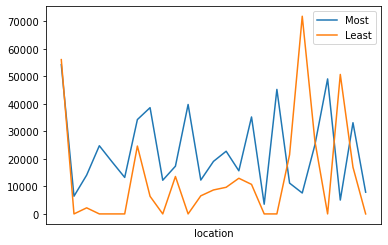

In [14]:
## What income group the countries affected fall into?
ax = most_cases_df["gdp_per_capita"].plot(label = "Most")
least_cases_df["gdp_per_capita"].plot(ax = ax, label = "Least")
plt.legend()
plt.xticks([])

# ML Analysis

In this section we use as supervised ML algorithm, to check which are the most important features in this dataset. In this section we see how variables affect the number of cases. Therefore, we drop total_deaths variable due to its high correlation to the total_cases variable.

The most relevant features, are those that determine the outcome the most; those that influence the predictor variable total_cases the most.

In [15]:
df_type_max = df.groupby(by=['location']).sum('total_cases')
df_type_max.head()


,total_cases,total_deaths,stringency_index,population,gdp_per_capita,HDI,TC,TD,STI,POP,GDPCAP
location,,,,,,,,,,,
Afghanistan,5126433.0,165875.0,13759.21,11444932254,530372.178,146.412,2000.646094,1226.948181,896.603996,5138.306531,2204.339821
Albania,1071951.0,31056.0,14295.98,647505000,2655771.975,176.625,1702.240756,929.368800,883.653354,3346.320751,2109.632744
Algeria,4893999.0,206429.0,16185.65,12892206642,4090668.666,221.676,2052.510847,1406.216387,939.379534,5173.314864,2804.947935
Andorra,223576.0,9850.0,9199.41,17461890,0.000,193.908,1465.828250,786.655112,787.230267,2543.629175,0.000000
Angola,304005.0,11820.0,15646.07,6967648816,1233732.940,123.172,1203.978763,590.138675,871.874556,3669.286969,1837.821379


In [16]:
df_type_max.info()


<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_cases       210 non-null    float64
 1   total_deaths      210 non-null    float64
 2   stringency_index  210 non-null    float64
 3   population        210 non-null    int64  
 4   gdp_per_capita    210 non-null    float64
 5   HDI               210 non-null    float64
 6   TC                210 non-null    float64
 7   TD                210 non-null    float64
 8   STI               210 non-null    float64
 9   POP               210 non-null    float64
 10  GDPCAP            210 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 19.7+ KB


# Preprocessing


We need to remove non-numeric variables (columns) from our dataset. We drop the following columns; iso_code, location and date.



In [17]:
# df_pre = df.drop(['iso_code', 'date'], axis=1)
df_pre = df_type_max.copy()
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_cases       210 non-null    float64
 1   total_deaths      210 non-null    float64
 2   stringency_index  210 non-null    float64
 3   population        210 non-null    int64  
 4   gdp_per_capita    210 non-null    float64
 5   HDI               210 non-null    float64
 6   TC                210 non-null    float64
 7   TD                210 non-null    float64
 8   STI               210 non-null    float64
 9   POP               210 non-null    float64
 10  GDPCAP            210 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 19.7+ KB


In [18]:
y_data = df_pre['total_cases'].to_numpy()
y_data

array([5.12643300e+06, 1.07195100e+06, 4.89399900e+06, 2.23576000e+05,
       3.04005000e+05, 6.14000000e+02, 1.26190000e+04, 4.71552340e+07,
       5.47462900e+06, 2.15110000e+05, 3.01237700e+06, 4.90919700e+06,
       4.23678200e+06, 2.37908000e+05, 6.54999500e+06, 3.52661780e+07,
       2.49980000e+04, 1.05951860e+07, 1.51924680e+07, 1.06383000e+05,
       2.45893000e+05, 2.88760000e+04, 2.28470000e+04, 1.18588380e+07,
       5.08000000e+03, 2.20005700e+06, 2.05758000e+05, 4.25704517e+08,
       4.60500000e+03, 3.01400000e+04, 1.89038000e+06, 2.31452000e+05,
       4.97450000e+04, 3.95390000e+04, 2.47650200e+06, 2.09023740e+07,
       4.63888000e+05, 3.31730000e+04, 5.93048000e+05, 1.54173000e+05,
       5.12680340e+07, 2.16323190e+07, 6.05436820e+07, 5.24370000e+04,
       4.73368000e+05, 4.63183500e+06, 2.13288300e+06, 1.31403100e+06,
       5.81546000e+05, 1.97770000e+04, 2.36673000e+05, 5.21398000e+06,
       1.27139100e+06, 3.03008800e+06, 7.81771000e+05, 3.97700000e+03,
      

In [19]:
# Drop the predictor variable from the dataset df_pre, and the variable total_deaths too.
df_pre = df_pre.drop(['total_cases', 'total_deaths'], axis=1)
df_pre.info()


<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, Afghanistan to Zimbabwe
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   stringency_index  210 non-null    float64
 1   population        210 non-null    int64  
 2   gdp_per_capita    210 non-null    float64
 3   HDI               210 non-null    float64
 4   TC                210 non-null    float64
 5   TD                210 non-null    float64
 6   STI               210 non-null    float64
 7   POP               210 non-null    float64
 8   GDPCAP            210 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 16.4+ KB


In [20]:
df_pre.head()


,stringency_index,population,gdp_per_capita,HDI,TC,TD,STI,POP,GDPCAP
location,,,,,,,,,
Afghanistan,13759.21,11444932254,530372.178,146.412,2000.646094,1226.948181,896.603996,5138.306531,2204.339821
Albania,14295.98,647505000,2655771.975,176.625,1702.240756,929.368800,883.653354,3346.320751,2109.632744
Algeria,16185.65,12892206642,4090668.666,221.676,2052.510847,1406.216387,939.379534,5173.314864,2804.947935
Andorra,9199.41,17461890,0.000,193.908,1465.828250,786.655112,787.230267,2543.629175,0.000000
Angola,15646.07,6967648816,1233732.940,123.172,1203.978763,590.138675,871.874556,3669.286969,1837.821379


In [21]:
# Drop highly correlated variables
corr = df_pre.corr()
corr.style.background_gradient(cmap='coolwarm')
corr_matrix = corr.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.25)]
print(to_drop)
if to_drop and (set(to_drop) & set(list(df_pre.columns))):
  df_pre = df_pre.drop(to_drop, axis=1)

valid_column = list(df_pre.columns)
valid_column


['HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP']


['stringency_index', 'population', 'gdp_per_capita']

In [23]:
# Convert the pandas dataframe df_pre to a numpy array; to enable computation.
X_data = df_pre.to_numpy()
X_data


array([[1.37592100e+04, 1.14449323e+10, 5.30372178e+05],
       [1.42959800e+04, 6.47505000e+08, 2.65577198e+06],
       [1.61856500e+04, 1.28922066e+10, 4.09066867e+06],
       [9.19941000e+03, 1.74618900e+07, 0.00000000e+00],
       [1.56460700e+04, 6.96764882e+09, 1.23373294e+06],
       [8.21350000e+03, 3.10541400e+06, 0.00000000e+00],
       [0.00000000e+00, 2.09565920e+07, 4.59906180e+06],
       [1.92432800e+04, 1.13893358e+10, 4.77134456e+06],
       [0.00000000e+00, 8.71190796e+08, 2.58354852e+06],
       [1.10983300e+04, 2.30614560e+07, 7.77033670e+06],
       [1.57693100e+04, 7.49696501e+09, 1.31267207e+07],
       [1.11607500e+04, 2.64788160e+09, 1.33583857e+07],
       [1.87133900e+04, 2.98091745e+09, 4.65914119e+06],
       [0.00000000e+00, 8.49415680e+07, 5.98705495e+06],
       [1.63082900e+04, 5.00265402e+08, 1.27274673e+07],
       [1.68109500e+04, 3.80432475e+10, 8.14040304e+05],
       [1.27464300e+04, 6.20721360e+07, 3.66726269e+06],
       [2.60261000e+03, 2.77810

# Normalize


In [24]:
# Normalize the data in range [0-1]

X_data_sc = X_data
y_data_sc = y_data

In [25]:
y_data_sc


array([5.12643300e+06, 1.07195100e+06, 4.89399900e+06, 2.23576000e+05,
       3.04005000e+05, 6.14000000e+02, 1.26190000e+04, 4.71552340e+07,
       5.47462900e+06, 2.15110000e+05, 3.01237700e+06, 4.90919700e+06,
       4.23678200e+06, 2.37908000e+05, 6.54999500e+06, 3.52661780e+07,
       2.49980000e+04, 1.05951860e+07, 1.51924680e+07, 1.06383000e+05,
       2.45893000e+05, 2.88760000e+04, 2.28470000e+04, 1.18588380e+07,
       5.08000000e+03, 2.20005700e+06, 2.05758000e+05, 4.25704517e+08,
       4.60500000e+03, 3.01400000e+04, 1.89038000e+06, 2.31452000e+05,
       4.97450000e+04, 3.95390000e+04, 2.47650200e+06, 2.09023740e+07,
       4.63888000e+05, 3.31730000e+04, 5.93048000e+05, 1.54173000e+05,
       5.12680340e+07, 2.16323190e+07, 6.05436820e+07, 5.24370000e+04,
       4.73368000e+05, 4.63183500e+06, 2.13288300e+06, 1.31403100e+06,
       5.81546000e+05, 1.97770000e+04, 2.36673000e+05, 5.21398000e+06,
       1.27139100e+06, 3.03008800e+06, 7.81771000e+05, 3.97700000e+03,
      

In [26]:
# Split the data into test and train tests
X_train, X_test, y_train, y_test = train_test_split(
  X_data_sc, y_data_sc, test_size=0.15, random_state=42
)


# Create the Model


In [27]:
# Define the LinearRegression model we're to use.
## Model Definition and scoring
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

r2_score(y_test, lr_pred)


0.38900845097573766

## Feature Importance



In [28]:
# We rank the variables based on their importance
importance = lr_model.coef_

for i, v in enumerate(importance):
  print("Feature: %25s, Score: %.5f" % (valid_column[i], v))

Feature:          stringency_index, Score: 583.21120
Feature:                population, Score: 0.00071
Feature:            gdp_per_capita, Score: 1.95031


<BarContainer object of 3 artists>

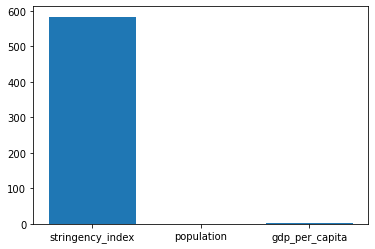

In [29]:
plt.bar([valid_column[x] for x in range(len(importance))], importance)
